# THIDくんの卒研：浮世絵顔画像から絵師を推定
# THID's Graduation Research: Estimating the Artist (Painter) from Ukiyo-e Face Images

ARC浮世絵顔データセット ＠人文学オープンデータ共同利用センター  
http://codh.rois.ac.jp/ukiyo-e/face-dataset/

以下の github に置かれた浮世絵全体の画像から，（同サイトで提供される）ツールを用いて顔部分を切り出しておく。  
We used a tool to cut out the faces from the following dataset on github.
https://github.com/rois-codh/arc-ukiyoe-faces/

(メモ) メタファイルおよび切り出した画像を arc-ukiyoe-faces.zip として One Drive に置いた。  
(Memo) I put the metafile and the cropped face image as arc-ukiyoe-faces.zip on One Drive.

## メタデータの整理
## Extracting information from metadata
画題(作品名)，絵師，画像ファイル名等が収められたメタデータを読み込み，
- 絵師分類に必要なデータに絞り込む
- 一定数以上の作品を残している絵師のみに絞り込む

Metadata containing the title (work name), artist (painter), image file name, etc. is read and 
- Narrow down to the data necessary to classify artists (painters)
- Narrow down to only painters who have left more than a certain number of works.

In [48]:
# メタデータの読み込み
# 画題，絵師，画像のファイル名などが手に入る
# Load metadata
# Get the title, artist name, image file name etc. of the works.
import pandas as pd
df = pd.read_csv("arc-ukiyoe-faces-main/scratch/arc_extracted_face_metadata.csv")
df.head()

,ACNo.,画題等,画題２,役名.代.役者,版元文字,版元1,判種,続方向,落款印章,絵師,...,所作題,所作題よみ,主外題,系統分類題,所蔵,画中文字,homeURL,SmallImageURL,LargeImageURL,filename
0,arcUP4368,「お嬢吉三 市川右団次」,NaN,お譲吉三 〈1〉市川 右団次,NaN,NaN,大判/錦絵,横,－,国周,...,NaN,NaN,NaN,役者絵,立命館ARC,NaN,https://www.dh-jac.net/db/nishikie/results-big...,https://www.arc.ritsumei.ac.jp/archive01/theat...,https://www.arc.ritsumei.ac.jp/archive01/theat...,00000001.jpg
1,arcUP2435,「菅原 三ノ口」,「松王丸」「梅王丸」,松王丸〈4〉中村 歌右衛門、梅王丸〈4〉三枡 大五郎,錦鯱堂,NaN,大判/錦絵(横),横,広貞,広貞,...,NaN,NaN,菅原伝授手習鑑,役者絵、上方絵,立命館ARC,NaN,https://www.dh-jac.net/db/nishikie/results-big...,https://www.arc.ritsumei.ac.jp/archive01/theat...,https://www.arc.ritsumei.ac.jp/archive01/theat...,00000002.jpg
2,arcUP2451,「堀口万右衛門」,NaN,堀口万右衛門〈5〉市川 海老蔵,－,NaN,中判/錦絵,横,広貞,広貞,...,NaN,NaN,NaN,役者絵,立命館ARC,NaN,https://www.dh-jac.net/db/nishikie/results-big...,https://www.arc.ritsumei.ac.jp/archive01/theat...,https://www.arc.ritsumei.ac.jp/archive01/theat...,00000003.jpg
3,arcUP2452,「木津勘助」,NaN,木津勘助〈1〉実川 延三郎,－,NaN,中判/錦絵,横,広貞,広貞,...,NaN,NaN,NaN,役者絵,立命館ARC,NaN,https://www.dh-jac.net/db/nishikie/results-big...,https://www.arc.ritsumei.ac.jp/archive01/theat...,https://www.arc.ritsumei.ac.jp/archive01/theat...,00000004.jpg
4,arcUP2444,「木津勘助」,NaN,木津勘助〈1〉実川 延三郎,断裁,NaN,中判/錦絵,横,広貞(印),広貞,...,NaN,NaN,NaN,役者絵、上方絵,立命館ARC,NaN,https://www.dh-jac.net/db/nishikie/results-big...,https://www.arc.ritsumei.ac.jp/archive01/theat...,https://www.arc.ritsumei.ac.jp/archive01/theat...,00000005.jpg


In [30]:
# 各絵師の描いた浮世絵の数をチェック
# (注意) 絵師の不明な浮世絵が 2644 件あることに注意！！
# Check the number of works painted by each artist
# (Note) Note that there are 2644 Ukiyo-e with unknown artist!

painters = df['絵師'].tolist()
print("画像数:", len(painters))

import collections
count = (collections.Counter(painters))
print(count)
'''
for name in list(count.keys()):
    if '国貞' in name:
        print(name)
'''

画像数: 16652
Counter({nan: 2644, '豊国〈3〉': 1564, '周延': 885, '国周': 706, '国芳': 699, '芳滝': 571, '－': 520, '国貞〈1〉': 482, '国貞〈2〉': 415, '広貞': 390, '芳年': 360, '耕漁': 353, '豊国〈1〉': 349, '国貞〈3〉': 339, '周重': 339, '芳虎': 331, '芳幾': 304, '土屋\u3000伝': 274, '貞信〈1〉': 235, '豊国〈4〉': 210, '国員': 189, '広重〈1〉': 178, '谷口桃僊': 160, '無款': 153, '貞信〈2〉': 140, '国輝': 139, '不明': 137, '吟光': 121, '英泉': 110, '国安': 104, '宗広': 101, '長秀': 101, '文挙': 94, '芳艶': 80, '田中\u3000良三': 80, '芳藤': 79, '芳虎、周麿': 79, '貞信〈3〉': 65, '春亭': 62, '大判/錦絵(横絵)': 59, '吟光ヵ': 56, '国明': 55, '貞房': 54, '貞芳': 53, '豊斎': 53, '豊宣': 50, '広瀬楓斎': 48, '春朝': 42, '松浦守美': 42, '東居': 41, '年英': 40, '広信': 39, '重宣': 38, '芳形': 38, '芳員': 36, '清親': 36, '貞秀': 34, '房種': 34, '国一': 34, '芳盛': 33, '国政〈3〉': 33, '都扇蝶': 33, '貞広〈1〉': 32, '貞綱': 31, '北洲': 30, '国直': 29, '芳豊': 28, '北斎': 28, '歌川芳仙ヵ': 28, '豊国〈2〉': 27, '暁斎': 27, '松野奏風': 26, '国郷': 26, '重春': 25, '芳梅': 24, '耕耘': 24, '延一': 24, '春貞': 23, '芳雪': 23, '国清': 23, '玉園': 23, '長谷川貞信〈2〉ヵ': 23, '国富〈1〉': 22, '国芳朝桜楼国芳画': 20, '国綱': 19, '芳光':

"\nfor name in list(count.keys()):\n    if '国貞' in name:\n        print(name)\n"

In [31]:
# 本問題で取り上げる「絵師」および「画像ファイル名」のみをデータフレームから取り出す
# さらに，NaN を含む行をカットする
# Extract from the data frame only the "painter" and "image file name" that are the subject of this problem.
# Cut the rows containing NaN from the data frame.
new_df = df[['絵師', 'filename']].dropna()
new_df

,絵師,filename
0,国周,00000001.jpg
1,広貞,00000002.jpg
2,広貞,00000003.jpg
3,広貞,00000004.jpg
4,広貞,00000005.jpg
...,...,...
16101,豊国〈3〉,00010292.jpg
16102,豊国〈3〉,00010292_face1.jpg
16103,豊国〈3〉,00010292_face2.jpg
16104,豊国〈3〉,00010294.jpg


In [32]:
# (NaN を覗いた後の)各絵師の描いた作品数をチェック
# Check the number of works painted by each artist (after removing NaN)
painters = new_df['絵師'].tolist()
print("画像数:", len(painters))

import collections
piece_count = (collections.Counter(painters)) # 各絵師の作品数 (number of works by each painter)
print(piece_count)

画像数: 14008
Counter({'豊国〈3〉': 1564, '周延': 885, '国周': 706, '国芳': 699, '芳滝': 571, '－': 520, '国貞〈1〉': 482, '国貞〈2〉': 415, '広貞': 390, '芳年': 360, '耕漁': 353, '豊国〈1〉': 349, '国貞〈3〉': 339, '周重': 339, '芳虎': 331, '芳幾': 304, '土屋\u3000伝': 274, '貞信〈1〉': 235, '豊国〈4〉': 210, '国員': 189, '広重〈1〉': 178, '谷口桃僊': 160, '無款': 153, '貞信〈2〉': 140, '国輝': 139, '不明': 137, '吟光': 121, '英泉': 110, '国安': 104, '宗広': 101, '長秀': 101, '文挙': 94, '芳艶': 80, '田中\u3000良三': 80, '芳藤': 79, '芳虎、周麿': 79, '貞信〈3〉': 65, '春亭': 62, '大判/錦絵(横絵)': 59, '吟光ヵ': 56, '国明': 55, '貞房': 54, '貞芳': 53, '豊斎': 53, '豊宣': 50, '広瀬楓斎': 48, '春朝': 42, '松浦守美': 42, '東居': 41, '年英': 40, '広信': 39, '重宣': 38, '芳形': 38, '芳員': 36, '清親': 36, '貞秀': 34, '房種': 34, '国一': 34, '芳盛': 33, '国政〈3〉': 33, '都扇蝶': 33, '貞広〈1〉': 32, '貞綱': 31, '北洲': 30, '国直': 29, '芳豊': 28, '北斎': 28, '歌川芳仙ヵ': 28, '豊国〈2〉': 27, '暁斎': 27, '松野奏風': 26, '国郷': 26, '重春': 25, '芳梅': 24, '耕耘': 24, '延一': 24, '春貞': 23, '芳雪': 23, '国清': 23, '玉園': 23, '長谷川貞信〈2〉ヵ': 23, '国富〈1〉': 22, '国芳朝桜楼国芳画': 20, '国綱': 19, '芳光': 18, '芳春': 

In [33]:
# 分類の性質上，学習・テストに一定数の画像を必要とするため，
# 作品数が PIECES_THRESHOLD 以上の絵師を抽出する
# Extract painters whose number of works is more than PIECES_THRESHOLD,
# because a certain number of images are required for training and testing
#due to the nature of classification.

PIECES_THRESHOLD = 30

major_painter_names = []
for painter_name, count in piece_count.items():
    if count >= PIECES_THRESHOLD:
        major_painter_names.append(painter_name)
        
major_painter_names # 作品数が PIECES_THRESHOLD 以上の絵師のリスト (# List of painters whose works are PIECES_THRESHOLD or higher)

['国周',
 '広貞',
 '国員',
 '貞信〈1〉',
 '豊国〈1〉',
 '国貞〈1〉',
 '豊国〈3〉',
 '宗広',
 '貞芳',
 '芳滝',
 '広信',
 '国貞〈2〉',
 '豊斎',
 '国芳',
 '芳虎',
 '貞房',
 '国貞〈3〉',
 '芳幾',
 '国明',
 '芳艶',
 '貞信〈2〉',
 '周重',
 '－',
 '芳年',
 '芳藤',
 '芳盛',
 '長秀',
 '無款',
 '耕漁',
 '国安',
 '春亭',
 '英泉',
 '広重〈1〉',
 '国輝',
 '大判/錦絵(横絵)',
 '吟光',
 '不明',
 '文挙',
 '周延',
 '貞秀',
 '房種',
 '重宣',
 '東居',
 '吟光ヵ',
 '芳虎、周麿',
 '北洲',
 '芳形',
 '貞信〈3〉',
 '芳員',
 '土屋\u3000伝',
 '田中\u3000良三',
 '貞広〈1〉',
 '豊国〈4〉',
 '貞綱',
 '豊宣',
 '春朝',
 '年英',
 '清親',
 '国政〈3〉',
 '都扇蝶',
 '国一',
 '谷口桃僊',
 '広瀬楓斎',
 '松浦守美']

In [34]:
# 絵師(painter)の名前と番号を対応付ける
# # Correspond to the artist's name and number
painter_name_number = dict()
painter_number = 0
for painter in major_painter_names:
    if painter not in painter_name_number:
        painter_name_number[painter] = painter_number
        painter_number += 1

painter_name_number

{'国周': 0,
 '広貞': 1,
 '国員': 2,
 '貞信〈1〉': 3,
 '豊国〈1〉': 4,
 '国貞〈1〉': 5,
 '豊国〈3〉': 6,
 '宗広': 7,
 '貞芳': 8,
 '芳滝': 9,
 '広信': 10,
 '国貞〈2〉': 11,
 '豊斎': 12,
 '国芳': 13,
 '芳虎': 14,
 '貞房': 15,
 '国貞〈3〉': 16,
 '芳幾': 17,
 '国明': 18,
 '芳艶': 19,
 '貞信〈2〉': 20,
 '周重': 21,
 '－': 22,
 '芳年': 23,
 '芳藤': 24,
 '芳盛': 25,
 '長秀': 26,
 '無款': 27,
 '耕漁': 28,
 '国安': 29,
 '春亭': 30,
 '英泉': 31,
 '広重〈1〉': 32,
 '国輝': 33,
 '大判/錦絵(横絵)': 34,
 '吟光': 35,
 '不明': 36,
 '文挙': 37,
 '周延': 38,
 '貞秀': 39,
 '房種': 40,
 '重宣': 41,
 '東居': 42,
 '吟光ヵ': 43,
 '芳虎、周麿': 44,
 '北洲': 45,
 '芳形': 46,
 '貞信〈3〉': 47,
 '芳員': 48,
 '土屋\u3000伝': 49,
 '田中\u3000良三': 50,
 '貞広〈1〉': 51,
 '豊国〈4〉': 52,
 '貞綱': 53,
 '豊宣': 54,
 '春朝': 55,
 '年英': 56,
 '清親': 57,
 '国政〈3〉': 58,
 '都扇蝶': 59,
 '国一': 60,
 '谷口桃僊': 61,
 '広瀬楓斎': 62,
 '松浦守美': 63}

In [49]:
new_df

,絵師,filename
0,国周,00000001.jpg
1,広貞,00000002.jpg
2,広貞,00000003.jpg
3,広貞,00000004.jpg
4,広貞,00000005.jpg
...,...,...
16101,豊国〈3〉,00010292.jpg
16102,豊国〈3〉,00010292_face1.jpg
16103,豊国〈3〉,00010292_face2.jpg
16104,豊国〈3〉,00010294.jpg


## データセットを作る
## Constract Dataset

In [35]:
# データセットを作る
# Constract thr dataset
painters = new_df['絵師'].tolist()
img_filenames = new_df['filename'].tolist()

img_dir = ("arc-ukiyoe-faces-main/scratch/arc_extracted_face_images/")

X = [] # 浮世絵(顔画像)のファイル名 (file names of Ukiyoe face image)
y = [] # 絵師を表す番号 (Number representing the painter)
for painter, img_filename in zip(painters, img_filenames):
    if painter in major_painter_names:
        X.append(img_dir + img_filename)
        y.append(painter_name_number[painter])

# 確認のため，先頭の５件を出力
# Output the first 5 results for confirmation
print(X[:5])
print(y[:5])

['arc-ukiyoe-faces-main/scratch/arc_extracted_face_images/00000001.jpg', 'arc-ukiyoe-faces-main/scratch/arc_extracted_face_images/00000002.jpg', 'arc-ukiyoe-faces-main/scratch/arc_extracted_face_images/00000003.jpg', 'arc-ukiyoe-faces-main/scratch/arc_extracted_face_images/00000004.jpg', 'arc-ukiyoe-faces-main/scratch/arc_extracted_face_images/00000005.jpg']
[0, 1, 1, 1, 1]


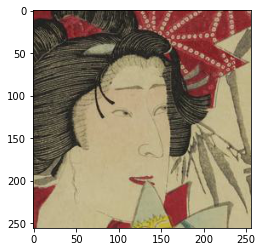

In [36]:
# 試しに１枚，表示してみる
# try to display one for a trial
from PIL import Image
import matplotlib.pyplot as plt
img = Image.open(X[0])
plt.imshow(img)
img.close()

In [37]:
# (参考) 全画像のサイズ及びモードをチェック
# → 全画像がサイズ (256, 256) ＆ RGB
# (Memo) Check size and mode of all images
# → All images have the size of (256, 256) & RGB mode

from PIL import Image

image_sizes = list()
image_modes = list()
for path in X:
    im = Image.open(path)
    image_sizes.append(im.size)
    image_modes.append(im.mode)
    im.close()
    
print(set(image_sizes))
print(set(image_modes))

{(256, 256)}
{'RGB'}


## 分類実験
## Classification
83クラス問題(=絵師は 83名)  
64 class classification problem (= 64 artists)

In [38]:
# 学習／テストへのデータセット分割
# Split dataset for training / testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [39]:
# Dataset クラスの定義
# Dataset definition

import numpy as np
from PIL import Image
from pathlib import Path
import torch
from torchvision import transforms

# Transformer の定義
# Transformer definition
transform = transforms.Compose([
    # transforms.Resize((50, 50)), # (メモ)全ての画像のサイズが (256, 256) だから resize しない
    # transforms.CenterCrop(224), # cenering はあってもよいかも
    transforms.ToTensor(),
])

# Dataset : データソースから1個ずつデータを取り出すクラス
# 実装が必要なメソッドは__getitem__と__len__の2つ
# Dataset : Class to retrieve data one by one from a data source
# There are two methods that need to be implemented: __getitem__ and __len__.

class MyDataset(torch.utils.data.Dataset):
    def __init__(self, image_paths, labels, transform=None): #, input_size):
        super().__init__()
        
        self.transform = transform
        self.image_paths = image_paths
        self.labels = labels
        self.len = len(self.image_paths)
        
    def __len__(self):
        return self.len
    
    def __getitem__(self, index):
        image_path = self.image_paths[index]
        label = self.labels[index]
        
        # 入力
        image = Image.open(image_path)
        
        if self.transform:
            image = self.transform(image)
        else:
            image = np.asarray(image)
            image = torch.from_numpy(image)
                
        return image, label

train_dataset = MyDataset(X_train, y_train, transform=transform)
test_dataset = MyDataset(X_test, y_test, transform=transform)

# 動作チェック
# Check if Dataset works
image, label = train_dataset[0]
print(image.size(), label)
print(type(image))
print(type(label))

torch.Size([3, 256, 256]) 21
<class 'torch.Tensor'>
<class 'int'>


In [40]:
# DataLoader の定義
# Dataloader definition

BATCH_SIZE = 16

trainloader = torch.utils.data.DataLoader(
    train_dataset, batch_size=BATCH_SIZE, shuffle=True,
    num_workers=4, drop_last=True
)

testloader = torch.utils.data.DataLoader(
    test_dataset, batch_size=BATCH_SIZE, shuffle=False,
    num_workers=4, drop_last=True
)

# 動作チェック
# Check if DataLoader works
images, labels = next(iter(trainloader))
print(images.size())  # torch.Size([16, 3, 256, 256])
print(labels.size())  # torch.Size([16])

torch.Size([16, 3, 256, 256])
torch.Size([16])


In [41]:
# モデル / optimizer / criterion の定義
# model / optimizer / criterion definition

import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models

# GPUあれば使う
# Use GPU if available
def check_cuda():
    return 'cuda' if torch.cuda.is_available() else 'cpu'

device = torch.device(check_cuda()) # "cuda"

import sys
print("device: {}".format(device), file=sys.stderr)

num_classes = 64 # クラス数 (Number of class)


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3)
        self.bn1 = nn.BatchNorm2d(32)
        self.bn2 = nn.BatchNorm2d(64)
        self.bn3 = nn.BatchNorm2d(128)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.avg = nn.AvgPool2d(4)
        self.fc = nn.Linear(128*7*7, num_classes)
        
    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = self.pool(F.relu(self.bn3(self.conv3(x))))
        # print("before avg:", x.shape)
        x = self.avg(x)
        # print("before:", x.shape)
        x = x.view(-1, 128*7*7)
        # print("after:", x.shape)
        x = self.fc(x)
        
        return x

net = Net()
net = net.to(device)
criterion = nn.CrossEntropyLoss()
# optimizer = optim.SGD(net.parameters(), lr=0.0001, momentum=0.9, weight_decay=0.005)
optimizer = optim.Adam(net.parameters(), lr=0.0001)

device: cuda


In [42]:
from tqdm import tqdm

# 学習 (Training)
# https://qiita.com/mathlive/items/8e1f9a8467fff8dfd03c

EPOCH = 50 # 30

train_loss_value=[]      #trainingのlossを保持するlist
train_acc_value=[]       #trainingのaccuracyを保持するlist
test_loss_value=[]       #tes%MCEPASTEBIN%tのlossを保持するlist
test_acc_value=[]        #testのaccuracyを保持するlist 

for epoch in range(EPOCH):
    print('epoch', epoch+1)    #epoch数の出力

    # 学習 (training)
    net.train() # 学習モード (Set to training mode)
    for (inputs, labels) in tqdm(trainloader):
        # print("inputs", inputs.shape)
        # print("labels", labels.shape)
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    #train dataを使ってテストをする(パラメータ更新がないようになっている)
    # test with train data (no parameter updates)
    sum_loss = 0.0          #lossの合計
    sum_correct = 0         #正解率の合計
    sum_total = 0           #dataの数の合計

    net.eval() # 評価モード
    for (inputs, labels) in trainloader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        sum_loss += loss.item()                            #lossを足していく
        _, predicted = outputs.max(1)                      #出力の最大値の添字(予想位置)を取得
        sum_total += labels.size(0)                        #labelの数を足していくことでデータの総和を取る
        sum_correct += (predicted == labels).sum().item()  #予想位置と実際の正解を比べ,正解している数だけ足す
    print("train mean loss={}, accuracy={}"
            .format(sum_loss*BATCH_SIZE/len(trainloader.dataset), float(sum_correct/sum_total)))  #lossとaccuracy出力
    train_loss_value.append(sum_loss*BATCH_SIZE/len(trainloader.dataset))  #traindataのlossをグラフ描画のためにlistに保持
    train_acc_value.append(float(sum_correct/sum_total))   #traindataのaccuracyをグラフ描画のためにlistに保持

    '''
    with open("/home/muto/Dropbox/20201230.txt", 'a') as fp:
        print('epoch{}'.format(epoch+1), file=fp)
        print("train  mean loss={}, accuracy={}"
              .format(sum_loss*BATCH_SIZE/len(trainloader.dataset), float(sum_correct/sum_total)), file=fp)
    '''
        
    #test dataを使ってテストをする
    # test with test data (no parameter updates)
    sum_loss = 0.0
    sum_correct = 0
    sum_total = 0

    cm_predicted_list = [] # confusion matrix で利用するため予測値を蓄える
    cm_true_list = [] # confusion matrix で利用するため真値を蓄える
    
    net.eval() # 評価モード
    for (inputs, labels) in testloader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        sum_loss += loss.item()
        _, predicted = outputs.max(1)
        sum_total += labels.size(0)
        sum_correct += (predicted == labels).sum().item()
        
        # confusion matrix のため予測値／真値を蓄える
        cm_predicted_list += predicted.tolist()
        cm_true_list += labels.tolist()
    print("test  mean loss={}, accuracy={}"
            .format(sum_loss*BATCH_SIZE/len(testloader.dataset), float(sum_correct/sum_total)))
    test_loss_value.append(sum_loss*BATCH_SIZE/len(testloader.dataset))
    test_acc_value.append(float(sum_correct/sum_total))

    '''
    with open("/home/muto/Dropbox/20201230.txt", 'a') as fp:
        print("test  mean loss={}, accuracy={}"
              .format(sum_loss*BATCH_SIZE/len(testloader.dataset), float(sum_correct/sum_total)), file=fp)
    '''

epoch 1


100%|██████████| 628/628 [00:26<00:00, 23.96it/s]


train mean loss=2.3057149492794635, accuracy=0.3900278662420382
test  mean loss=2.5109804832200644, accuracy=0.35071656050955413
epoch 2


100%|██████████| 628/628 [00:26<00:00, 23.75it/s]


train mean loss=1.8597806320046293, accuracy=0.503781847133758
test  mean loss=2.176543664647855, accuracy=0.42277070063694266
epoch 3


100%|██████████| 628/628 [00:27<00:00, 22.55it/s]


train mean loss=1.6244705396866341, accuracy=0.5616042993630573
test  mean loss=2.0621049331149335, accuracy=0.45302547770700635
epoch 4


100%|██████████| 628/628 [00:27<00:00, 22.58it/s]


train mean loss=1.4834375624226637, accuracy=0.5862858280254777
test  mean loss=2.0105031167062566, accuracy=0.4609872611464968
epoch 5


100%|██████████| 628/628 [00:27<00:00, 22.58it/s]


train mean loss=1.2787220787430682, accuracy=0.65625
test  mean loss=1.8827548374001597, accuracy=0.5115445859872612
epoch 6


100%|██████████| 628/628 [00:27<00:00, 22.58it/s]


train mean loss=1.1178335638540313, accuracy=0.7051154458598726
test  mean loss=1.7853190412578241, accuracy=0.5298566878980892
epoch 7


100%|██████████| 628/628 [00:27<00:00, 22.56it/s]


train mean loss=1.0258327129762665, accuracy=0.7192476114649682
test  mean loss=1.7571311457730667, accuracy=0.5346337579617835
epoch 8


100%|██████████| 628/628 [00:27<00:00, 22.60it/s]


train mean loss=0.9762161594268353, accuracy=0.736265923566879
test  mean loss=1.791942833811341, accuracy=0.527468152866242
epoch 9


100%|██████████| 628/628 [00:27<00:00, 22.55it/s]


train mean loss=0.8428752419487956, accuracy=0.7682125796178344
test  mean loss=1.7177358088863062, accuracy=0.5433917197452229
epoch 10


100%|██████████| 628/628 [00:27<00:00, 22.60it/s]


train mean loss=0.7727862981864729, accuracy=0.7914012738853503
test  mean loss=1.678276140125798, accuracy=0.5549363057324841
epoch 11


100%|██████████| 628/628 [00:27<00:00, 22.55it/s]


train mean loss=0.7227355830295074, accuracy=0.7972730891719745
test  mean loss=1.664680652352972, accuracy=0.5664808917197452
epoch 12


100%|██████████| 628/628 [00:27<00:00, 22.57it/s]


train mean loss=0.6336075906619834, accuracy=0.8398686305732485
test  mean loss=1.6154851517193833, accuracy=0.5816082802547771
epoch 13


100%|██████████| 628/628 [00:27<00:00, 22.56it/s]


train mean loss=0.6309318691595798, accuracy=0.8349920382165605
test  mean loss=1.6294973928933114, accuracy=0.5684713375796179
epoch 14


100%|██████████| 628/628 [00:27<00:00, 22.56it/s]


train mean loss=0.573331392604361, accuracy=0.8499203821656051
test  mean loss=1.6610410246649983, accuracy=0.5744426751592356
epoch 15


100%|██████████| 628/628 [00:27<00:00, 22.56it/s]


train mean loss=0.5261002456832503, accuracy=0.8729100318471338
test  mean loss=1.6098602861817741, accuracy=0.5875796178343949
epoch 16


100%|██████████| 628/628 [00:27<00:00, 22.56it/s]


train mean loss=0.4918065920992212, accuracy=0.8659434713375797
test  mean loss=1.6352236772389346, accuracy=0.5772292993630573
epoch 17


100%|██████████| 628/628 [00:27<00:00, 22.54it/s]


train mean loss=0.4234033264601291, accuracy=0.8993829617834395
test  mean loss=1.5850353506402988, accuracy=0.5851910828025477
epoch 18


100%|██████████| 628/628 [00:27<00:00, 22.56it/s]


train mean loss=0.4258278498204385, accuracy=0.8954020700636943
test  mean loss=1.6458152609838406, accuracy=0.5867834394904459
epoch 19


100%|██████████| 628/628 [00:27<00:00, 22.57it/s]


train mean loss=0.42448457600499784, accuracy=0.884156050955414
test  mean loss=1.6756427789540225, accuracy=0.5887738853503185
epoch 20


100%|██████████| 628/628 [00:27<00:00, 22.56it/s]


train mean loss=0.38015881935526247, accuracy=0.9057523885350318
test  mean loss=1.630573598812399, accuracy=0.5879777070063694
epoch 21


100%|██████████| 628/628 [00:27<00:00, 22.54it/s]


train mean loss=0.34048124176139943, accuracy=0.9193869426751592
test  mean loss=1.6515522716059599, accuracy=0.5991242038216561
epoch 22


100%|██████████| 628/628 [00:27<00:00, 22.55it/s]


train mean loss=0.3092432323822127, accuracy=0.9353105095541401
test  mean loss=1.6442478597045656, accuracy=0.6019108280254777
epoch 23


100%|██████████| 628/628 [00:27<00:00, 22.57it/s]


train mean loss=0.31012616045991576, accuracy=0.9267515923566879
test  mean loss=1.6706599445987649, accuracy=0.598328025477707
epoch 24


100%|██████████| 628/628 [00:27<00:00, 22.55it/s]


train mean loss=0.2642506471243983, accuracy=0.9415804140127388
test  mean loss=1.630126309631833, accuracy=0.6102707006369427
epoch 25


100%|██████████| 628/628 [00:27<00:00, 22.46it/s]


train mean loss=0.26302421276714216, accuracy=0.9342157643312102
test  mean loss=1.679688942266506, accuracy=0.5991242038216561
epoch 26


100%|██████████| 628/628 [00:27<00:00, 22.56it/s]


train mean loss=0.24719276867508355, accuracy=0.9461584394904459
test  mean loss=1.6752112426530297, accuracy=0.6039012738853503
epoch 27


100%|██████████| 628/628 [00:27<00:00, 22.57it/s]


train mean loss=0.25046430545499454, accuracy=0.9414808917197452
test  mean loss=1.7088303533747466, accuracy=0.606687898089172
epoch 28


100%|██████████| 628/628 [00:27<00:00, 22.58it/s]


train mean loss=0.19716771916436596, accuracy=0.9635748407643312
test  mean loss=1.721382478596439, accuracy=0.6035031847133758
epoch 29


100%|██████████| 628/628 [00:27<00:00, 22.55it/s]


train mean loss=0.21869522491980228, accuracy=0.9526273885350318
test  mean loss=1.8158901637401543, accuracy=0.5911624203821656
epoch 30


100%|██████████| 628/628 [00:27<00:00, 22.58it/s]


train mean loss=0.1815010339682508, accuracy=0.96984474522293
test  mean loss=1.7126064014245217, accuracy=0.6122611464968153
epoch 31


100%|██████████| 628/628 [00:27<00:00, 22.59it/s]


train mean loss=0.16439266923355322, accuracy=0.9726313694267515
test  mean loss=1.702974298886703, accuracy=0.6118630573248408
epoch 32


100%|██████████| 628/628 [00:27<00:00, 22.60it/s]


train mean loss=0.1655258533731066, accuracy=0.9707404458598726
test  mean loss=1.7330325243250275, accuracy=0.60828025477707
epoch 33


100%|██████████| 628/628 [00:27<00:00, 22.57it/s]


train mean loss=0.16330429957989753, accuracy=0.9684514331210191
test  mean loss=1.8203304231996327, accuracy=0.60828025477707
epoch 34


100%|██████████| 628/628 [00:27<00:00, 22.58it/s]


train mean loss=0.1421015926599621, accuracy=0.9739251592356688
test  mean loss=1.7746321556819362, accuracy=0.6218152866242038
epoch 35


100%|██████████| 628/628 [00:27<00:00, 22.55it/s]


train mean loss=0.11491693149590168, accuracy=0.9835788216560509
test  mean loss=1.7445878106604513, accuracy=0.6269904458598726
epoch 36


100%|██████████| 628/628 [00:27<00:00, 22.58it/s]


train mean loss=0.11223954643153689, accuracy=0.9818869426751592
test  mean loss=1.7676327720551084, accuracy=0.6285828025477707
epoch 37


100%|██████████| 628/628 [00:27<00:00, 22.53it/s]


train mean loss=0.11512672940714169, accuracy=0.9857683121019108
test  mean loss=1.755886713790135, accuracy=0.6162420382165605
epoch 38


100%|██████████| 628/628 [00:27<00:00, 22.58it/s]


train mean loss=0.10175575748600116, accuracy=0.9885549363057324
test  mean loss=1.7913293351235968, accuracy=0.6301751592356688
epoch 39


100%|██████████| 628/628 [00:27<00:00, 22.56it/s]


train mean loss=0.09740487035622093, accuracy=0.9867635350318471
test  mean loss=1.845989244358677, accuracy=0.625
epoch 40


100%|██████████| 628/628 [00:27<00:00, 22.56it/s]


train mean loss=0.09987647181431081, accuracy=0.9874601910828026
test  mean loss=1.868024323332618, accuracy=0.6142515923566879
epoch 41


100%|██████████| 628/628 [00:27<00:00, 22.57it/s]


train mean loss=0.08839479405564438, accuracy=0.9896496815286624
test  mean loss=1.824085554593126, accuracy=0.6277866242038217
epoch 42


100%|██████████| 628/628 [00:27<00:00, 22.59it/s]


train mean loss=0.07904477440434919, accuracy=0.9920382165605095
test  mean loss=1.9195866055801423, accuracy=0.6186305732484076
epoch 43


100%|██████████| 628/628 [00:27<00:00, 22.57it/s]


train mean loss=0.0979545841539334, accuracy=0.9859673566878981
test  mean loss=1.9664251199536484, accuracy=0.6046974522292994
epoch 44


100%|██████████| 628/628 [00:27<00:00, 22.61it/s]


train mean loss=0.07804755598197012, accuracy=0.9926353503184714
test  mean loss=1.9352821569082514, accuracy=0.6162420382165605
epoch 45


100%|██████████| 628/628 [00:27<00:00, 22.58it/s]


train mean loss=0.07303896241287855, accuracy=0.9906449044585988
test  mean loss=1.9273946077638782, accuracy=0.6265923566878981
epoch 46


100%|██████████| 628/628 [00:27<00:00, 22.57it/s]


train mean loss=0.08354890037895114, accuracy=0.9885549363057324
test  mean loss=1.9844270657829453, accuracy=0.598328025477707
epoch 47


100%|██████████| 628/628 [00:27<00:00, 22.56it/s]


train mean loss=0.06489365432473292, accuracy=0.9926353503184714
test  mean loss=1.964539296679184, accuracy=0.6114649681528662
epoch 48


100%|██████████| 628/628 [00:27<00:00, 22.57it/s]


train mean loss=0.04784621188669517, accuracy=0.9967157643312102
test  mean loss=1.9498794610647274, accuracy=0.6381369426751592
epoch 49


100%|██████████| 628/628 [00:27<00:00, 22.60it/s]


train mean loss=0.05917966021029461, accuracy=0.995421974522293
test  mean loss=1.9416422199302354, accuracy=0.6238057324840764
epoch 50


100%|██████████| 628/628 [00:27<00:00, 22.60it/s]


train mean loss=0.06015963793990685, accuracy=0.9918391719745223
test  mean loss=1.9603799639828874, accuracy=0.6210191082802548


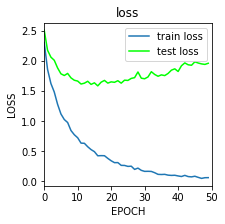

In [43]:
# 損失の可視化
# loss visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(3, 3))

plt.plot(range(EPOCH), train_loss_value)
plt.plot(range(EPOCH), test_loss_value, c='#00ff00')
plt.xlim(0, EPOCH)
# plt.ylim(0, 2.5)
plt.xlabel('EPOCH')
plt.ylabel('LOSS')
plt.legend(['train loss', 'test loss'])
plt.title('loss')
plt.savefig("loss_image.png")

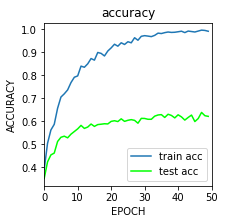

In [44]:
# 正解率の可視化
# accuracy visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(3, 3))

plt.plot(range(EPOCH), train_acc_value)
plt.plot(range(EPOCH), test_acc_value, c='#00ff00')
plt.xlim(0, EPOCH)
# plt.ylim(0, 1)
plt.xlabel('EPOCH')
plt.ylabel('ACCURACY')
plt.legend(['train acc', 'test acc'])
plt.title('accuracy')
plt.savefig("accuracy_image.png")

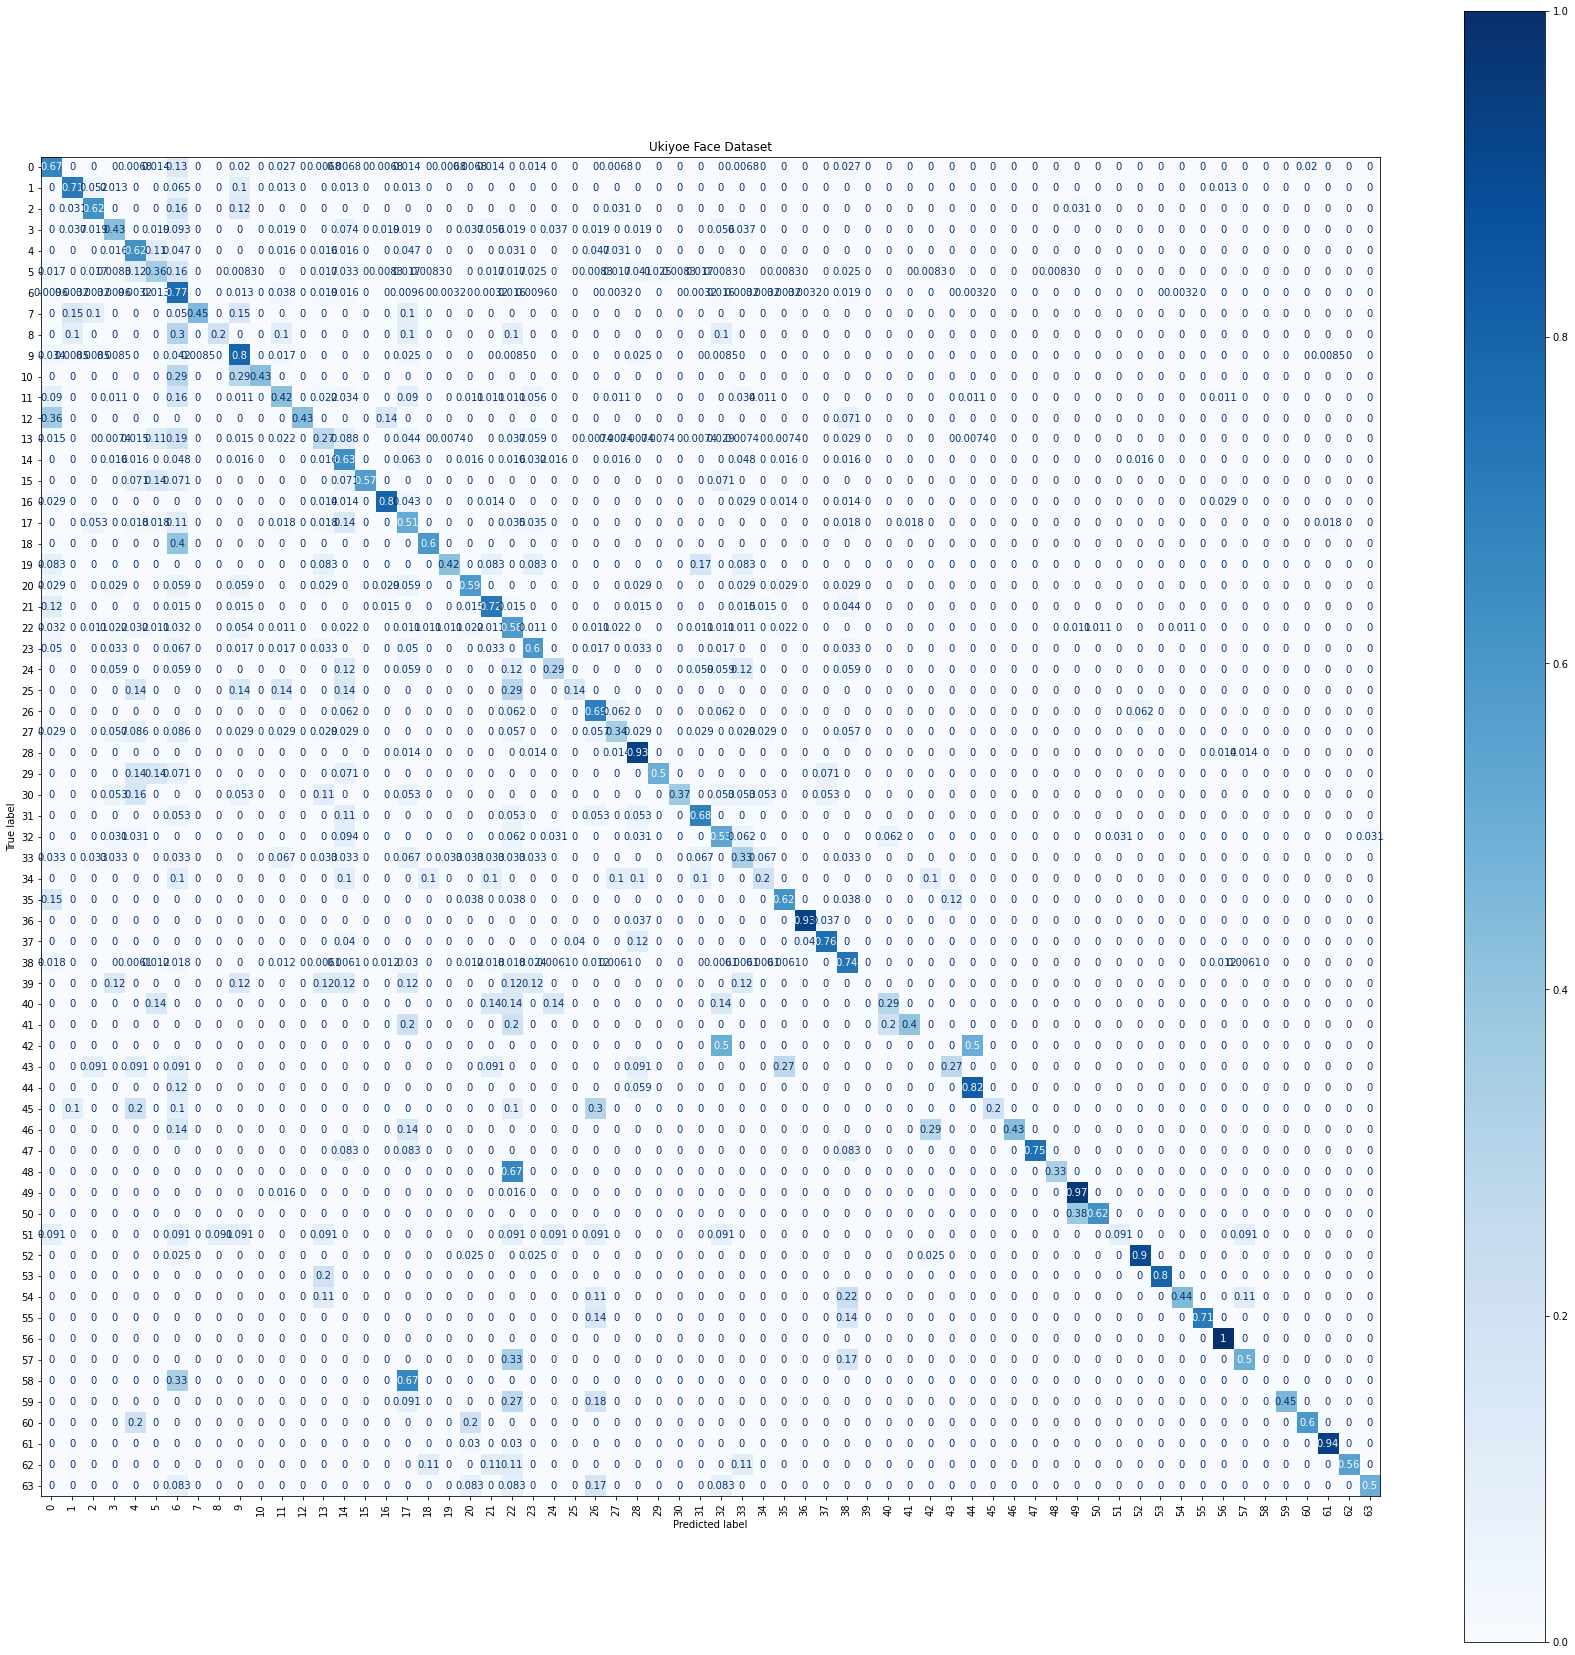

In [47]:
# confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(cm_true_list, cm_predicted_list, normalize='true')
cmp = ConfusionMatrixDisplay(cm) #, display_labels=class_names)

fig, ax = plt.subplots(figsize=(30, 30))
ax.set_title('Ukiyoe Face Dataset')
cmp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical', ax=ax)